# CONTEXT: 
University X is currently undergoing some research involving understanding the characteristics of flowers. They already have 
have invested on curating sample images. They require an automation which can create a classifier capable of determining a flower’s 
species from a photo.

# DATA DESCRIPTION: 
The dataset comprises of images from 12 plant species.

# OBJECTIVE: 
To experiment with various approaches to train an image classifier to predict type of flower from the image.

In [ ]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
os.chdir('/content/drive/My Drive/PyData/CVProject1')
os.getcwd()

'/content/drive/My Drive/PyData/CVProject1'

In [ ]:
images_path = "/content/drive/My Drive/PyData/CVProject1/plant-seedlings-classification.zip"

Q1A- Extraction of zip file into a new folder.

**Extracting the dataset.zip to the present working directory**

In [ ]:
from zipfile import ZipFile
with ZipFile(images_path,'r') as zip:
  zip.extractall()

In [ ]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2 
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import svm, metrics
from natsort import natsorted
from mpl_toolkits.axes_grid1 import ImageGrid
%matplotlib inline
import glob
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve, GridSearchCV

**Part - 1** 

In [ ]:
#Separating data with labels, so that we can use different algorithm
dataset = '/content/drive/My Drive/PyData/CVProject1/plant-seedlings-classification/train'
X = []
y = []
labels = []

# list all folders inside train directory
for i in os.listdir(dataset):
    print(i)
    if i!= '.DS_Store':   
      labels.append(i)        
      for j in os.listdir(os.path.join(dataset, i)):
        # read each image inside train directory one by one
        dummy = cv2.imread(os.path.join(dataset, i, j))
        dummy = cv2.resize(dummy, (128, 128))   # Resizing can be any number - 128 is just kept for standard reference
        X.append(dummy)
        y.append(i)
    

Cleavers
Sugar beet
Common Chickweed
Loose Silky-bent
Scentless Mayweed
Shepherds Purse
Fat Hen
Common wheat
Black-grass
Small-flowered Cranesbill
Charlock
Maize


In [ ]:
#see number of images in each label
images = np.array(X)
classes = np.array(y)
print("images shape: ", images.shape)
print("classes shape: ", classes.shape)

images shape:  (4750, 128, 128, 3)
classes shape:  (4750,)


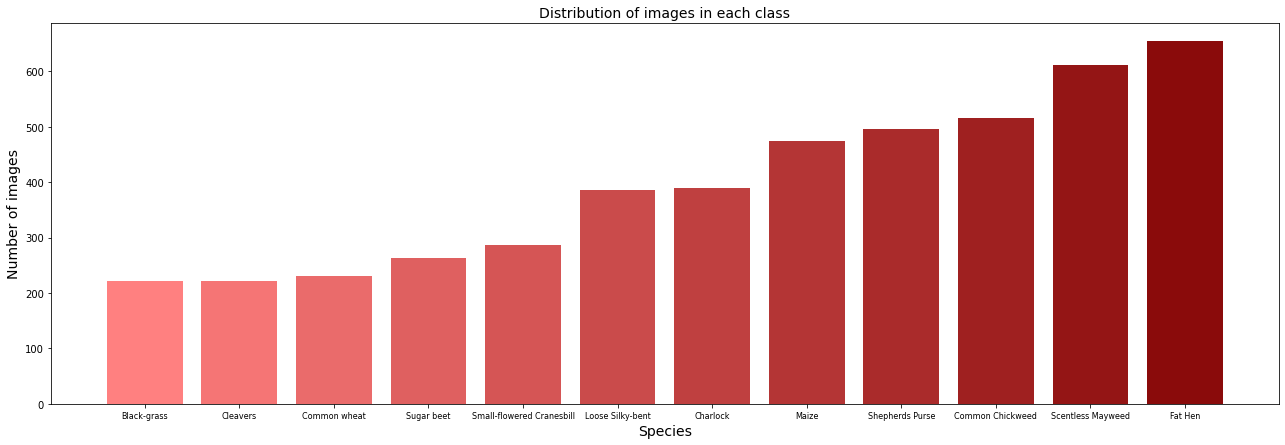

In [ ]:
# Distribution of images in each class
values =[]
labels=[]
for label in set(classes):
  values.append(len(images[classes == label]))
  labels.append(label)

values.sort()

code=np.arange(0,13,1)
data_normalizer = mp.colors.Normalize()
color_map = mp.colors.LinearSegmentedColormap(
    "my_map",
    {
        "red": [(0, 1.0, 1.0),
                (1.0, .5, .5)],
        "green": [(0, 0.5, 0.5),
                  (1.0, 0, 0)],
        "blue": [(0, 0.50, 0.5),
                 (1.0, 0, 0)]
    }
)

fig, ax = plt.subplots(figsize=(22,7))
ax.bar(labels, values, color=color_map(data_normalizer(code)))
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 10)
plt.xlabel("Species", fontsize = 14)
plt.ylabel("Number of images", fontsize = 14)
plt.title("Distribution of images in each class", fontsize=14)
plt.show()


In [ ]:
# ANALYZE LABELS

Labels = np.unique(y)  # DISPLAY UNIQUE LABELS

NumberOfLabels = len(Labels)  # LENGTH OF UNIQUES LABELS

print('\nLabels : ', Labels)

print('\nTotal number of labels : ', NumberOfLabels)



Labels :  ['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherds Purse' 'Small-flowered Cranesbill' 'Sugar beet']

Total number of labels :  12


In [ ]:
cd"/content/drive/My Drive/PyData/CVProject1/plant-seedlings-classification"

/content/drive/My Drive/PyData/CVProject1/plant-seedlings-classification


In [ ]:
paths = glob.glob("train/*")
len(paths)

12

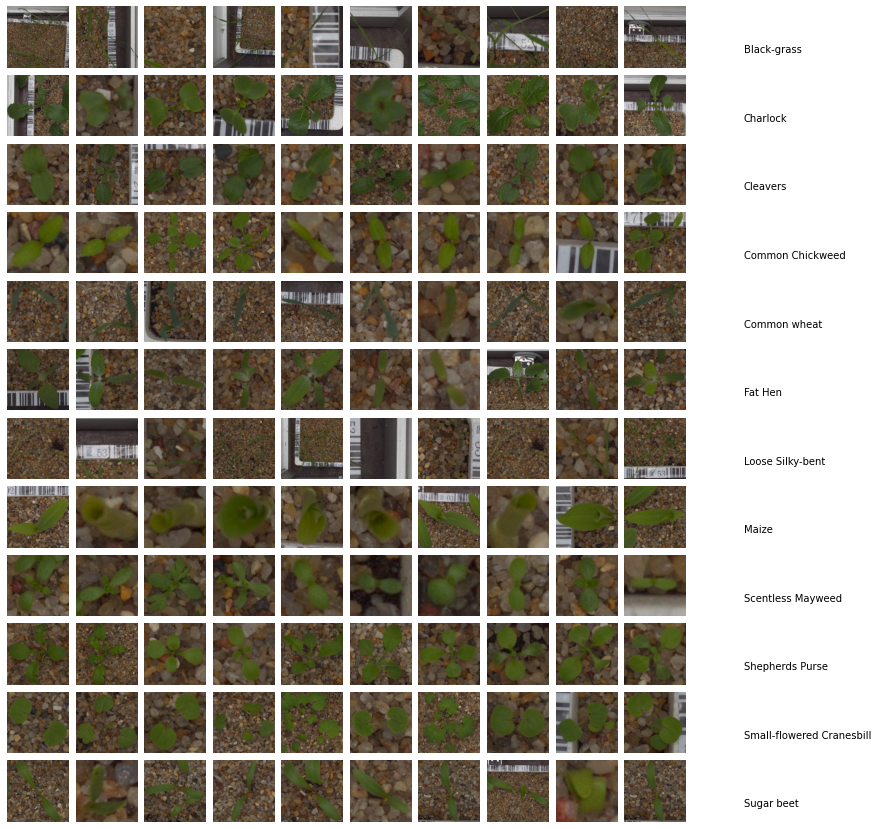

In [ ]:
# Showing 10 arbitrary samples from each class
fig = plt.figure(1, (20, 15))
grid = ImageGrid(fig, 111, nrows_ncols=(12, 10), axes_pad=0.1)

n_img_class = []
counter = 0
for idx, label in enumerate(Labels):
    paths = glob.glob(os.path.join("train", label, "*.png"))
    n_img_class.append([label, len(paths)])
    perm = np.random.choice(len(paths), size=10)

    title = True
    for ii in perm:
        ax = grid[counter]
        if title:
            ax.text(1800, 105, label, verticalalignment="center")
            title = False
        img = cv2.imread(paths[ii])
        img = cv2.resize(img, (150, 150))
        ax.axis("off")
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        counter += 1
        
plt.show()

In [ ]:
# visualizing 'n' number of random images in the dataset along with their labels

def randImgDis(n):
  rand = np.random.randint(0, len(X), n) # Generating n random numbers out of total number of flowers
  print(rand)
  plt.figure(figsize=(20, 20))
  for i,j in enumerate(rand):
    plt.subplot(1, len(rand), i+1)
    plt.imshow(X[j])  # greens, reds, blues, rgb
    plt.title("{}".format(y[j]))
    plt.axis('off')
plt.show()

[3201 1154 2612  374 2314 4691]


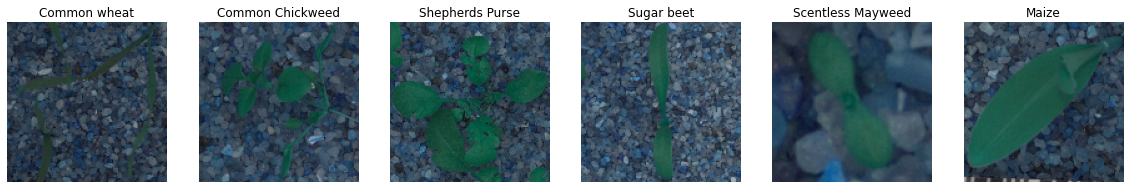

In [ ]:
# Visualising 6 images
randImgDis(6)

**Classification using Convolution Neural Network (CNN)**

In [ ]:
import tensorflow 

In [ ]:
#imorting some more libraries
import itertools
from tensorflow.keras.layers import Dense, Dropout, InputLayer, BatchNormalization, Flatten
from tensorflow.keras.layers import GlobalAveragePooling2D, Conv2D, MaxPool2D, GlobalMaxPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalMaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, RMSprop

In [ ]:
# encoding classes
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y2 = enc.fit_transform(classes)

In [ ]:
y2[0]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, y2, test_size=0.3, random_state=50)

**Normalizing the data**

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3325, 128, 128, 3)
(1425, 128, 128, 3)
(3325, 12)
(1425, 12)


In [ ]:
X_train = X_train.astype('float32')
X_train = X_train / 255.

X_test = X_test.astype('float32')
X_test = X_test / 255.

print('\nTraining data : ', X_train.shape)  # TRAIN

print('\nTesting data : ', X_test.shape) # TEST


Training data :  (3325, 128, 128, 3)

Testing data :  (1425, 128, 128, 3)


In [ ]:
# Splitting the dataset
random_seed = 2
X_test, X_val, y_test, y_val = train_test_split(X_test,y_test, test_size = 0.5, random_state=random_seed)

In [ ]:
num_classes = len(np.unique(y_train))
num_classes

2

In [ ]:
model_performance = pd.DataFrame(columns=['Model', 'Accuracy', 'Loss'])

**Reading the image to predict**

**Classification using Convolution Neural Network (CNN)**

In [ ]:
def cnn_model(height, width, num_channels, num_classes, loss='categorical_crossentropy', metrics=['accuracy']):
  batch_size = None

  model = Sequential()

  model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', activation ='relu', batch_input_shape = (batch_size,height, width, num_channels)))


  model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', activation ='relu'))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(0.2))


  model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
  model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'same', activation ='relu'))
  model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
  model.add(Dropout(0.3))

  model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
  model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
  model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
  model.add(Dropout(0.4))



  model.add(GlobalMaxPooling2D())
  model.add(Dense(256, activation = "relu"))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation = "softmax"))

  optimizer = Adam(lr=1e-3)
  model.compile(optimizer = optimizer, loss = loss, metrics = metrics)
  model.summary()
  return model

In [ ]:
cnn = cnn_model(128,128,3,12)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 64)        36928     
                                                        

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
#fitting the model
history = cnn.fit(X_train,y_train,epochs = 50,validation_data = (X_val,y_val))
                  

Epoch 1/50
104/104 [==============================] - 16s 41ms/step - loss: 2.4393 - accuracy: 0.1299 - val_loss: 2.4368 - val_accuracy: 0.1122
Epoch 2/50
104/104 [==============================] - 4s 35ms/step - loss: 2.1715 - accuracy: 0.2559 - val_loss: 2.0775 - val_accuracy: 0.3422
Epoch 3/50
104/104 [==============================] - 4s 34ms/step - loss: 1.9209 - accuracy: 0.3053 - val_loss: 2.0269 - val_accuracy: 0.3324
Epoch 4/50
104/104 [==============================] - 4s 34ms/step - loss: 1.8092 - accuracy: 0.3456 - val_loss: 1.9062 - val_accuracy: 0.3520
Epoch 5/50
104/104 [==============================] - 4s 34ms/step - loss: 1.7732 - accuracy: 0.3444 - val_loss: 1.8209 - val_accuracy: 0.4025
Epoch 6/50
104/104 [==============================] - 3s 34ms/step - loss: 1.7304 - accuracy: 0.3735 - val_loss: 1.7140 - val_accuracy: 0.4208
Epoch 7/50
104/104 [==============================] - 3s 34ms/step - loss: 1.6206 - accuracy: 0.4066 - val_loss: 1.6251 - val_accuracy: 0.493

In [ ]:
# Measuring the acuracy of the above model
cnn_loss, cnn_accuracy = cnn.evaluate(X_test, y_test, verbose=1)
print('Test loss:', cnn_loss)
print('Test accuracy:', cnn_accuracy)

23/23 [==============================] - 0s 14ms/step - loss: 0.5098 - accuracy: 0.8371
Test loss: 0.5098191499710083
Test accuracy: 0.8370786309242249


In [ ]:
model_performance = model_performance.append({'Model':'CNN',
                                              'Accuracy': cnn_accuracy,
                                              'Loss': cnn_loss,
                                                                                    
                                              }, ignore_index = True)

model_performance

Model  Accuracy      Loss
0   CNN  0.837079  0.509819

In [ ]:
from keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.5,min_lr=0.00001)
epochs = 30
batch_size = 38

Trying to improve the model

In [ ]:
# With data augmentation to prevent overfitting

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [ ]:
# X_train, X_test, y_train, y_test
history = cnn.fit(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/30


87/87 - 13s - loss: 0.5347 - accuracy: 0.8068 - val_loss: 0.4553 - val_accuracy: 0.8612 - lr: 0.0010 - 13s/epoch - 145ms/step
Epoch 2/30


87/87 - 11s - loss: 0.5364 - accuracy: 0.8135 - val_loss: 0.4860 - val_accuracy: 0.8415 - lr: 0.0010 - 11s/epoch - 131ms/step
Epoch 3/30


87/87 - 12s - loss: 0.4605 - accuracy: 0.8327 - val_loss: 0.4327 - val_accuracy: 0.8555 - lr: 0.0010 - 12s/epoch - 133ms/step
Epoch 4/30


87/87 - 11s - loss: 0.4827 - accuracy: 0.8257 - val_loss: 0.4989 - val_accuracy: 0.8345 - lr: 0.0010 - 11s/epoch - 132ms/step
Epoch 5/30


87/87 - 11s - loss: 0.5098 - accuracy: 0.8251 - val_loss: 0.5208 - val_accuracy: 0.8331 - lr: 0.0010 - 11s/epoch - 130ms/step
Epoch 6/30


87/87 - 11s - loss: 0.4974 - accuracy: 0.8147 - val_loss: 0.4487 - val_accuracy: 0.8752 - lr: 0.0010 - 11s/epoch - 130ms/step
Epoch 7/30


87/87 - 11s - loss: 0.4841 - accuracy: 0.8178 - val_loss: 0.4658 - val_accuracy: 0.8429 - lr: 0.0010 - 11s/epoch - 131ms/step
Epoch 8/30


87/87 - 11s - loss: 0.4434 - accuracy: 0.8339 - val_loss: 0.4419 - val_accuracy: 0.8583 - lr: 0.0010 - 11s/epoch - 132ms/step
Epoch 9/30


87/87 - 11s - loss: 0.4700 - accuracy: 0.8302 - val_loss: 0.4691 - val_accuracy: 0.8233 - lr: 0.0010 - 11s/epoch - 131ms/step
Epoch 10/30


87/87 - 12s - loss: 0.4443 - accuracy: 0.8363 - val_loss: 0.4377 - val_accuracy: 0.8555 - lr: 0.0010 - 12s/epoch - 134ms/step
Epoch 11/30


87/87 - 12s - loss: 0.4554 - accuracy: 0.8378 - val_loss: 0.4532 - val_accuracy: 0.8569 - lr: 0.0010 - 12s/epoch - 134ms/step
Epoch 12/30


87/87 - 12s - loss: 0.4235 - accuracy: 0.8436 - val_loss: 0.4979 - val_accuracy: 0.8401 - lr: 0.0010 - 12s/epoch - 135ms/step
Epoch 13/30


87/87 - 11s - loss: 0.4378 - accuracy: 0.8415 - val_loss: 0.4010 - val_accuracy: 0.8597 - lr: 0.0010 - 11s/epoch - 132ms/step
Epoch 14/30


87/87 - 11s - loss: 0.4387 - accuracy: 0.8357 - val_loss: 0.4158 - val_accuracy: 0.8569 - lr: 0.0010 - 11s/epoch - 131ms/step
Epoch 15/30


87/87 - 11s - loss: 0.4462 - accuracy: 0.8375 - val_loss: 0.4334 - val_accuracy: 0.8710 - lr: 0.0010 - 11s/epoch - 131ms/step
Epoch 16/30


87/87 - 11s - loss: 0.4071 - accuracy: 0.8518 - val_loss: 0.3868 - val_accuracy: 0.8836 - lr: 0.0010 - 11s/epoch - 130ms/step
Epoch 17/30


87/87 - 11s - loss: 0.4079 - accuracy: 0.8491 - val_loss: 0.3841 - val_accuracy: 0.8738 - lr: 0.0010 - 11s/epoch - 131ms/step
Epoch 18/30


87/87 - 11s - loss: 0.4009 - accuracy: 0.8464 - val_loss: 0.4037 - val_accuracy: 0.8640 - lr: 0.0010 - 11s/epoch - 131ms/step
Epoch 19/30


87/87 - 11s - loss: 0.3884 - accuracy: 0.8582 - val_loss: 0.4474 - val_accuracy: 0.8541 - lr: 0.0010 - 11s/epoch - 131ms/step
Epoch 20/30


87/87 - 11s - loss: 0.3941 - accuracy: 0.8564 - val_loss: 0.3751 - val_accuracy: 0.8934 - lr: 0.0010 - 11s/epoch - 131ms/step
Epoch 21/30


87/87 - 11s - loss: 0.4206 - accuracy: 0.8375 - val_loss: 0.3828 - val_accuracy: 0.8934 - lr: 0.0010 - 11s/epoch - 130ms/step
Epoch 22/30


87/87 - 11s - loss: 0.3802 - accuracy: 0.8594 - val_loss: 0.3930 - val_accuracy: 0.8738 - lr: 0.0010 - 11s/epoch - 132ms/step
Epoch 23/30


87/87 - 11s - loss: 0.3894 - accuracy: 0.8570 - val_loss: 0.4033 - val_accuracy: 0.8682 - lr: 0.0010 - 11s/epoch - 131ms/step
Epoch 24/30


87/87 - 11s - loss: 0.3912 - accuracy: 0.8540 - val_loss: 0.3778 - val_accuracy: 0.8696 - lr: 0.0010 - 11s/epoch - 130ms/step
Epoch 25/30


87/87 - 12s - loss: 0.3797 - accuracy: 0.8622 - val_loss: 0.4079 - val_accuracy: 0.8724 - lr: 0.0010 - 12s/epoch - 133ms/step
Epoch 26/30


87/87 - 11s - loss: 0.3769 - accuracy: 0.8601 - val_loss: 0.3738 - val_accuracy: 0.8864 - lr: 0.0010 - 11s/epoch - 130ms/step
Epoch 27/30


87/87 - 11s - loss: 0.3664 - accuracy: 0.8607 - val_loss: 0.3514 - val_accuracy: 0.8724 - lr: 0.0010 - 11s/epoch - 131ms/step
Epoch 28/30


87/87 - 11s - loss: 0.3452 - accuracy: 0.8740 - val_loss: 0.3575 - val_accuracy: 0.8850 - lr: 0.0010 - 11s/epoch - 131ms/step
Epoch 29/30


87/87 - 11s - loss: 0.3484 - accuracy: 0.8686 - val_loss: 0.3789 - val_accuracy: 0.8780 - lr: 0.0010 - 11s/epoch - 130ms/step
Epoch 30/30


87/87 - 11s - loss: 0.3499 - accuracy: 0.8704 - val_loss: 0.3812 - val_accuracy: 0.8752 - lr: 0.0010 - 11s/epoch - 130ms/step


In [ ]:
cnn_loss_aug, cnn_accuracy_aug = cnn.evaluate(X_test, y_test, verbose=1)
print('Test loss:', cnn_loss_aug)
print('Test accuracy:', cnn_accuracy_aug)

23/23 [==============================] - 0s 12ms/step - loss: 0.4670 - accuracy: 0.8329
Test loss: 0.46695375442504883
Test accuracy: 0.8328651785850525


In [ ]:
model_performance = model_performance.append({'Model':'CNNA',
                                              'Accuracy': cnn_accuracy_aug,
                                              'Loss': cnn_loss_aug,
                                                                                  
                                              }, ignore_index=True)

model_performance

Model  Accuracy      Loss
0   CNN  0.837079  0.509819
1  CNNA  0.832865  0.466954

So the model did not improve

**Model evaluation**

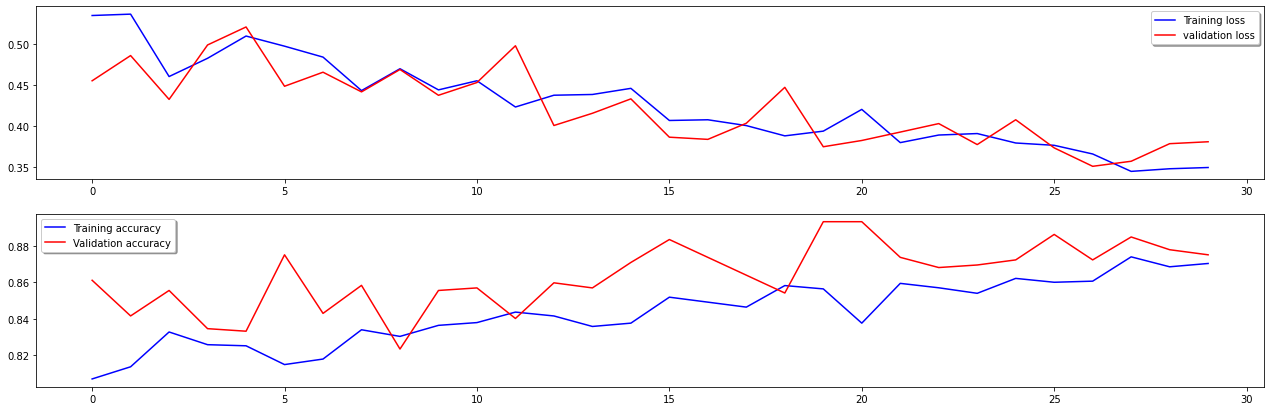

In [ ]:
fig, ax = plt.subplots(2,1 , figsize=(22,7))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

labels: ['Black-grass', 'Cleavers', 'Common wheat', 'Sugar beet', 'Small-flowered Cranesbill', 'Loose Silky-bent', 'Charlock', 'Maize', 'Shepherds Purse', 'Common Chickweed', 'Scentless Mayweed', 'Fat Hen']
Softmax Outputs: [[3.92764232e-05 2.58041471e-01 5.12451708e-01 4.88239201e-03
  2.79338390e-04 4.96494956e-02 9.48163597e-06 1.05831900e-03
  1.20437527e-02 3.96080390e-02 1.16227575e-01 5.70909958e-03]]
1.0
Predicted_Label: Common wheat


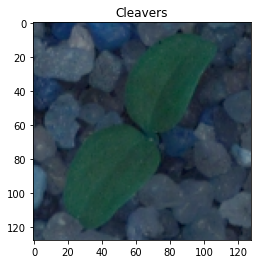

In [ ]:
# Chooseing a random image and trying to predict it's label
import matplotlib.pyplot as plt
%matplotlib inline
n = 5
p = enc.inverse_transform(y_test)
print('labels:', labels)
plt.title(p[n])
plt.imshow(X_test[n])
y_pred = cnn.predict(X_test[n].reshape(1, 128,128,3))
print("Softmax Outputs:", y_pred)
print(y_pred.sum())


# Convert the predicted probabilities to labels

for i in y_pred:
    for j, k in enumerate(i):
        if k == y_pred.max():
            print('Predicted_Label:', labels[j])

# Context:
University X is currently undergoing some research involving understanding the characteristics of flowers. They already have 
have invested on curating sample images. They require an automation which can create a classifier capable of determining a flower’s 
species from a photo.

# Data Description:
The dataset comprises of images from 17 plant species.It is part of tflearn.

# Objective:
To experiment with various approaches to train an image classifier to predict type of flower from the image.

**Part - 2**

In [ ]:
!pip install tflearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 107 kB 7.3 MB/s 
  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=127299 sha256=f8d2de5aeb5aecc1c5f2c9600f38b33f94db20879fd1a704172149cf5b53c365
  Stored in directory: /root/.cache/pip/wheels/5f/14/2e/1d8e28cc47a5a931a2fb82438c9e37ef9246cc6a3774520271
Successfully built tflearn


In [ ]:
import tflearn.datasets.oxflower17 as oxflower17

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
#Importing all the necessary libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mp
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.svm import SVC

import tensorflow as tf
import tflearn.datasets.oxflower17 as oxflower17 # Importing dataset

from PIL import Image , ImageFilter, ImageOps # Image handling Library
import cv2 as cv # Image handling Library

**Importing data**

In [ ]:
from sklearn.model_selection import train_test_split
X, y = oxflower17.load_data(one_hot= False)

100.0% 60276736 / 60270631


Succesfully downloaded 17flowers.tgz 60270631 bytes.
File Extracted
Starting to parse images...
Parsing Done!


In [ ]:
print(X.shape, y.shape)

(1360, 224, 224, 3) (1360,)


In [ ]:
project_path = "/content/drive/My Drive/PyData/CVProject1/17flowers/jpg"
img_size = 224
img_depth = 3
X_new =[]
y_new = []

In [ ]:
os.chdir(project_path)

In [ ]:
os.listdir()

['files.txt~',
 'files.txt',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16']

In [ ]:
#Making list for easy traverse
l = os.listdir()
l.remove("files.txt")
l.remove("files.txt~")
print(l)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16']


In [ ]:
#Loading data from CWD 
for i in l:
  #print(i)
  for j in os.listdir(i):
    #print(project_path + '/' + i + '/' + j)
    temp = cv.imread(project_path + '/' + i + '/' + j)
    temp = cv.cvtColor(temp, cv.COLOR_BGR2RGB)
    temp_resize = cv.resize(temp, (img_size, img_size))
    X_new.append(temp_resize)
    y_new.append(i)

**Shape of the data**

In [ ]:
X_new = np.array(X_new)
print("Dimesions of data : ", X_new.shape)

Dimesions of data :  (1360, 224, 224, 3)


In [ ]:
y_new = np.array(y_new)
print("Dimesions of labels : ", y_new.shape)

Dimesions of labels :  (1360,)


In [ ]:
print("Image size : ", X_new[0].shape)

Image size :  (224, 224, 3)


In [ ]:
type(y_new)

numpy.ndarray

**Counts of each class in y**

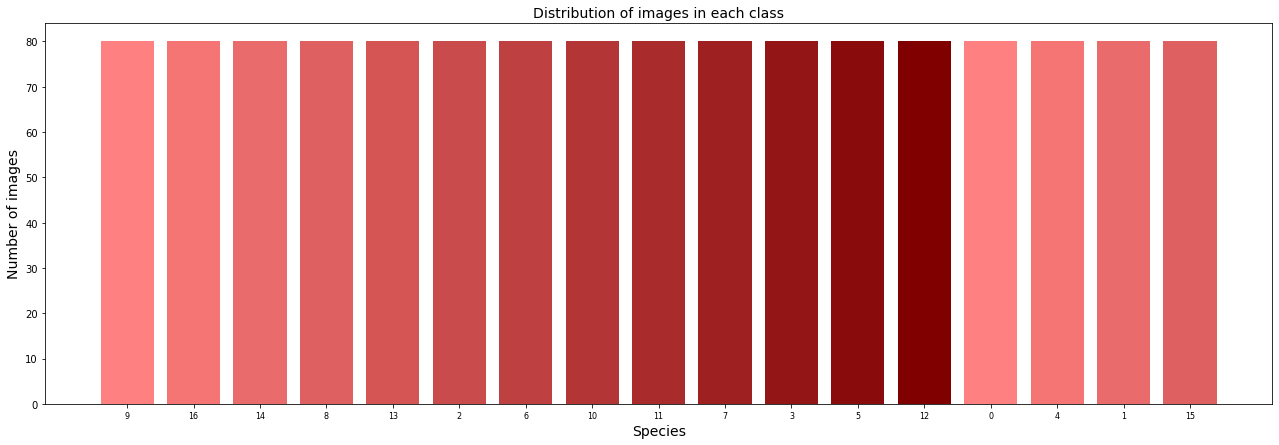

In [ ]:
values =[]
labels=[]
for label in set(y_new):
  values.append(len(X_new[y_new == label]))
  labels.append(label)

values.sort()

code=np.arange(0,13,1)
data_normalizer = mp.colors.Normalize()
color_map = mp.colors.LinearSegmentedColormap(
    "my_map",
    {
        "red": [(0, 1.0, 1.0),
                (1.0, .5, .5)],
        "green": [(0, 0.5, 0.5),
                  (1.0, 0, 0)],
        "blue": [(0, 0.50, 0.5),
                 (1.0, 0, 0)]
    }
)

fig, ax = plt.subplots(figsize=(22,7))
ax.bar(labels, values, color=color_map(data_normalizer(code)))
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 10)
plt.xlabel("Species", fontsize = 14)
plt.ylabel("Number of images", fontsize = 14)
plt.title("Distribution of images in each class", fontsize=14)
plt.show()

**Displaying five random images**

In [ ]:
def randImgDis(n):
  rand = np.random.randint(0, len(X_new), n) # Generating n random numbers out of total number of flowers
  print(rand)
  plt.figure(figsize=(20, 20))
  for i,j in enumerate(rand):
    plt.subplot(1, len(rand), i+1)
    plt.imshow(X_new[j])  # greens, reds, blues, rgb
    plt.title("{}".format(y_new[j]))
    plt.axis('off')
plt.show()

[ 532  768 1288  513 1082]


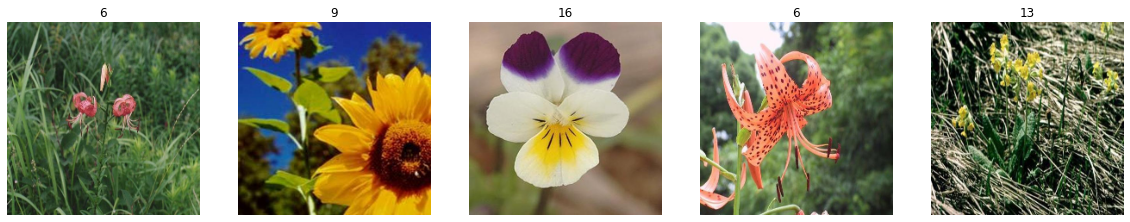

In [ ]:
randImgDis(5)

[1231]


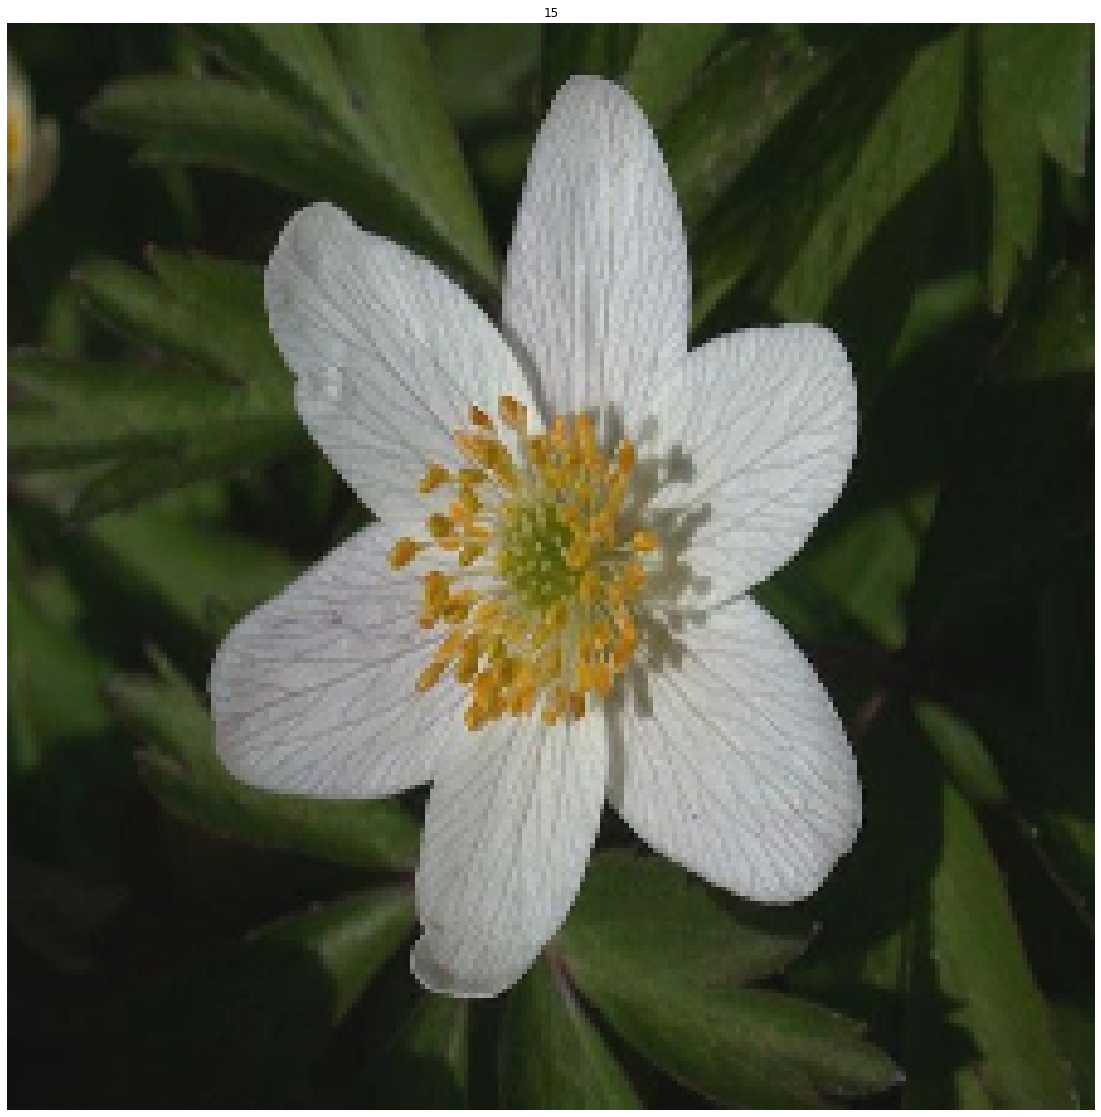

In [ ]:
imgC = randImgDis(1); #choosing randomly

In [ ]:
img = Image.open('/content/drive/My Drive/PyData/CVProject1/17flowers/jpg/14/image_1196.jpg') # Randomly chosen image(above image) saved under a variable

**Geray Scale image**

In [ ]:
from skimage import color
from skimage import io

Text(0.5, 0, 'GreyScale')

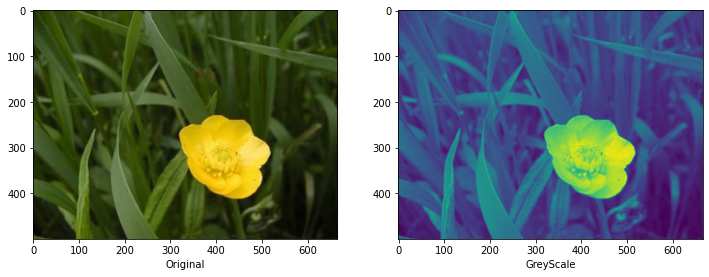

In [ ]:
filtered_imgG = ImageOps.grayscale(img)
plt.figure(figsize=(12,12))
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.subplot(2,2,1)
plt.imshow(np.asarray(img))
plt.xlabel('Original')
plt.subplot(2,2,2)
plt.imshow(np.asarray(filtered_imgG))
plt.xlabel('GreyScale')

**Sharpen**

Text(0.5, 0, 'Sharpened')

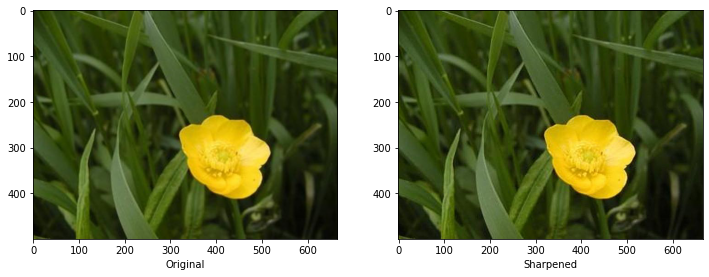

In [ ]:
filtered_imgS = img.filter(ImageFilter.SHARPEN)
plt.figure(figsize=(12,12))
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.subplot(2,2,1)
plt.imshow(np.asarray(img))
plt.xlabel('Original')
plt.subplot(2,2,2)
plt.imshow(np.asarray(filtered_imgS))
plt.xlabel('Sharpened')

**Blur**

Text(0.5, 0, 'Blured')

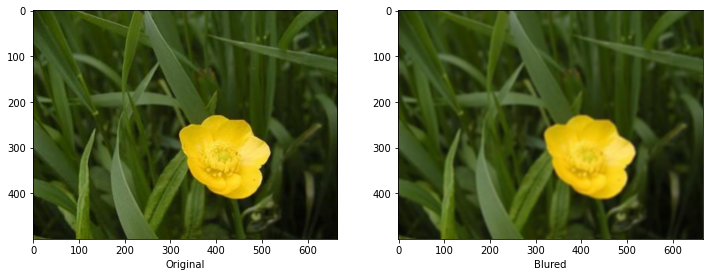

In [ ]:
filtered_imgB = img.filter(ImageFilter.BLUR)
plt.figure(figsize=(12,12))
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.subplot(2,2,1)
plt.imshow(np.asarray(img))
plt.xlabel('Original')
plt.subplot(2,2,2)
plt.imshow(np.asarray(filtered_imgB))
plt.xlabel('Blured')

**Four images side by side**

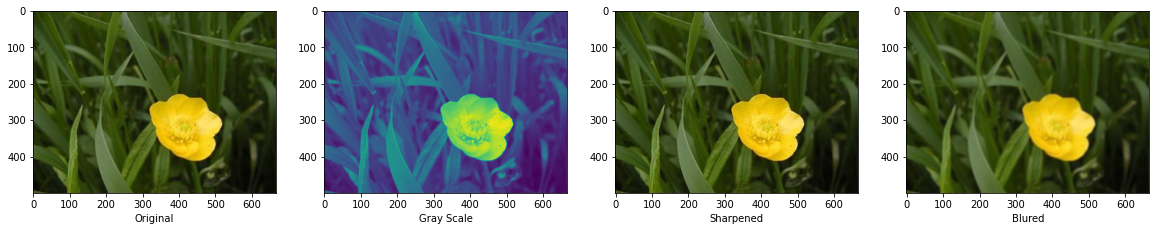

In [ ]:
plt.figure(figsize=(20,20))
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.subplot(1,4,1)
plt.imshow(np.asarray(img))
plt.xlabel('Original')
plt.subplot(1,4,2)
plt.imshow(np.asarray(filtered_imgG))
plt.xlabel('Gray Scale')
plt.subplot(1,4,3)
plt.imshow(np.asarray(filtered_imgS))
plt.xlabel('Sharpened')
plt.subplot(1,4,4)
plt.imshow(np.asarray(filtered_imgB))
plt.xlabel('Blured');

**Preprocessing the data**

In [ ]:
# Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, shuffle = True, random_state = 42, stratify = y_new)

In [ ]:
print("Dimesions of training data : ", X_train.shape)
print("Dimesions of testing data : ", X_test.shape)

Dimesions of training data :  (1088, 224, 224, 3)
Dimesions of testing data :  (272, 224, 224, 3)


In [ ]:
# Randomly shuffle the training data
X_train, y_train = shuffle(X_train, y_train)

In [ ]:
# Declaring no. of classes variable
num_classes = 17 # 0 - 16
print("No. of Classes : ", num_classes)

No. of Classes :  17


In [ ]:
#One hot encoding the train labels
y_train = tf.keras.utils.to_categorical(y_train,num_classes) 
#One hot encoding the test labels
y_test = tf.keras.utils.to_categorical(y_test,num_classes)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
#Normalize both the train and test image data from 0-255 to 0-1
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
X_train /= 255
X_test /= 255

In [ ]:
#Reshaping the image data
X_train = X_train.reshape(X_train.shape[0],img_size,img_size,img_depth) 
X_test = X_test.reshape(X_test.shape[0],img_size,img_size,img_depth)

**Display the labels**

In [ ]:
np.unique(y_new)

array(['0', '1', '10', '11', '12', '13', '14', '15', '16', '2', '3', '4',
       '5', '6', '7', '8', '9'], dtype='<U2')

Sorting labels

In [ ]:
l_new = []
for i in range(0, len(l)): 
  l_new.append(int(l[i]))

l_new.sort()
print(l_new)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]


Defining classes instead of numbers for labels

In [ ]:
classes = ['Daffodil','Snowdrop','LilyValley','Bluebell','Crocus','Iris','Tigerlily','Tulip','Fritillary','Sunflower','Daisy','ColtisFoot','Dandelion','Cowslip','Buttercup','Windflower','Pansy']


In [ ]:
# using dictionary comprehension 
# to convert lists to dictionary 
Labels = {l_new[i]: classes[i] for i in range(len(l_new))} 
  
# Printing resultant dictionary  
print ("Labels is : " +  str(Labels))

Labels is : {0: 'Daffodil', 1: 'Snowdrop', 2: 'LilyValley', 3: 'Bluebell', 4: 'Crocus', 5: 'Iris', 6: 'Tigerlily', 7: 'Tulip', 8: 'Fritillary', 9: 'Sunflower', 10: 'Daisy', 11: 'ColtisFoot', 12: 'Dandelion', 13: 'Cowslip', 14: 'Buttercup', 15: 'Windflower', 16: 'Pansy'}


**Display images vs labels( five random imges with labels)**

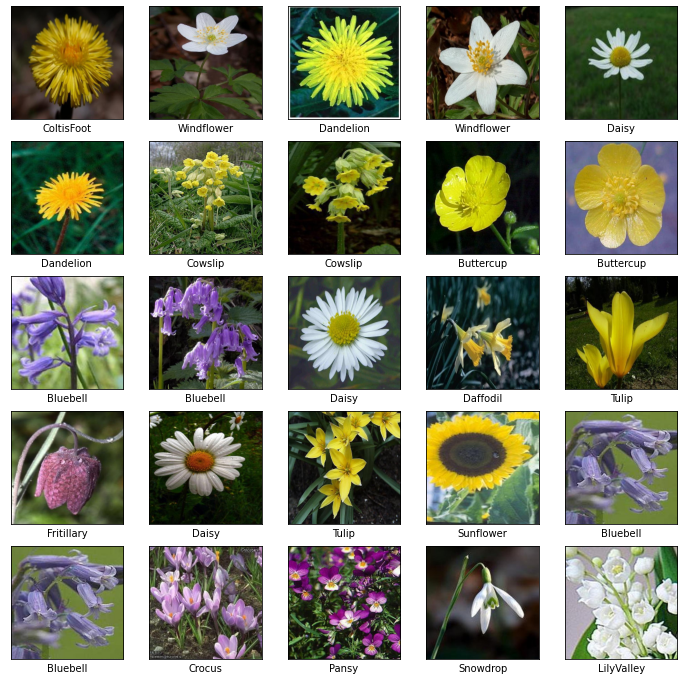

In [ ]:
from random import randint
plt.figure(figsize=(12,12)) # plot 25 images
for i in range(25):
    value = randint(0,1360)
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_new[value],cmap=plt.cm.binary)
    plt.xlabel(Labels[int(y_new[value])])

**Model building**

In [ ]:
#Creating DataFrame for storing the accuracies of all different models
col_names = ['Model', 'Accuracy']
resultsdf = pd.DataFrame(columns = col_names)
print(resultsdf)

Empty DataFrame
Columns: [Model, Accuracy]
Index: []


Supervised learning

In [ ]:
print("Actual training data shape : ", X_train.shape)
print("Actual training label shape : ", y_train.shape)

Actual training data shape :  (1088, 224, 224, 3)
Actual training label shape :  (1088, 17)


In [ ]:
#Flattening the traning data
nsamples, nx, ny, nz = X_train.shape
d2_X_train = X_train.reshape((nsamples,nx*ny*nz))

In [ ]:
#Flattening the testing data
nsamples, nx, ny, nz = X_test.shape
d2_X_test = X_test.reshape((nsamples,nx*ny*nz))

In [ ]:
print("After flattening training data shape : " ,d2_X_train.shape)
print("After flattening testing data shape : " ,d2_X_test.shape)

After flattening training data shape :  (1088, 150528)
After flattening testing data shape :  (272, 150528)


**Here the data is suffering form curse of dimensionality, It will overfit if we use normal ML algorithms.**

**Naive Bayes**

In [ ]:
# Declaring MultinomialNB Classifier
clfNM = MultinomialNB()

# Training model
clfNM.fit(d2_X_train,(np.argmax(y_train ,axis=-1)))

# Predicting for all of test dataset
predM = clfNM.predict(d2_X_test)

print("Accuracy Score of training set: {}".format(accuracy_score(np.argmax(y_train, axis=1),clfNM.predict(d2_X_train)))) 
print("Accuracy Score of testing set: {}".format(accuracy_score(np.argmax(y_test, axis=1),predM)))

Accuracy Score of training set: 0.5137867647058824
Accuracy Score of testing set: 0.3272058823529412


In [ ]:
# Adding Final accuracy value to Results DataFrame
tempResultsDf = pd.DataFrame({'Model':['MultinomialNB'],'Accuracy': (accuracy_score(np.argmax(y_test, axis=1), predM))},index={'1'})
resultsdf = pd.concat([resultsdf, tempResultsDf])
resultsdf

Model  Accuracy
1  MultinomialNB  0.327206

In [ ]:
clfG = GaussianNB()

# Training model
clfG.fit(d2_X_train,(np.argmax(y_train ,axis=-1)))

# Predicting for all of test dataset
predG = clfG.predict(d2_X_test)

print("Accuracy Score of training set: {}".format(accuracy_score(np.argmax(y_train, axis=1),clfG.predict(d2_X_train)))) 
print("Accuracy Score of testing set: {}".format(accuracy_score(np.argmax(y_test, axis=1),predG)))

Accuracy Score of training set: 0.515625
Accuracy Score of testing set: 0.35294117647058826


In [ ]:

# Adding Final accuracy value to Results DataFrame
tempResultsDf1 = pd.DataFrame({'Model':['GaussianNB'],'Accuracy': (accuracy_score(np.argmax(y_test, axis=1), predG))},index={'2'})
resultsdf = pd.concat([resultsdf, tempResultsDf1])
resultsdf

Model  Accuracy
1  MultinomialNB  0.327206
2     GaussianNB  0.352941

**Support Vector Machine**

In [ ]:
clfS = SVC(C= .1, kernel='linear', gamma= 1)

# Training model
clfS.fit(d2_X_train,(np.argmax(y_train ,axis=-1)))

# Predicting for all of test dataset
pred = clfS.predict(d2_X_test)

print("Accuracy Score of training set: {}".format(accuracy_score(np.argmax(y_train, axis=1),clfS.predict(d2_X_train)))) 
print("Accuracy Score of testing set: {}".format(accuracy_score(np.argmax(y_test, axis=1),pred)))

Accuracy Score of training set: 1.0
Accuracy Score of testing set: 0.5183823529411765


In [ ]:
# Adding Final accuracy value to Results DataFrame
tempResultsDf2 = pd.DataFrame({'Model':['support vector machine'],'Accuracy': (accuracy_score(np.argmax(y_test, axis=1), pred))},index={'3'})
resultsdf = pd.concat([resultsdf, tempResultsDf2])
resultsdf

**Here we can easily observed that Support vector machine is performing better than Naive Bayes**

Text(0.5, 1.0, 'Accuracy Score for Support Vector Classifier: 0.5183823529411765')

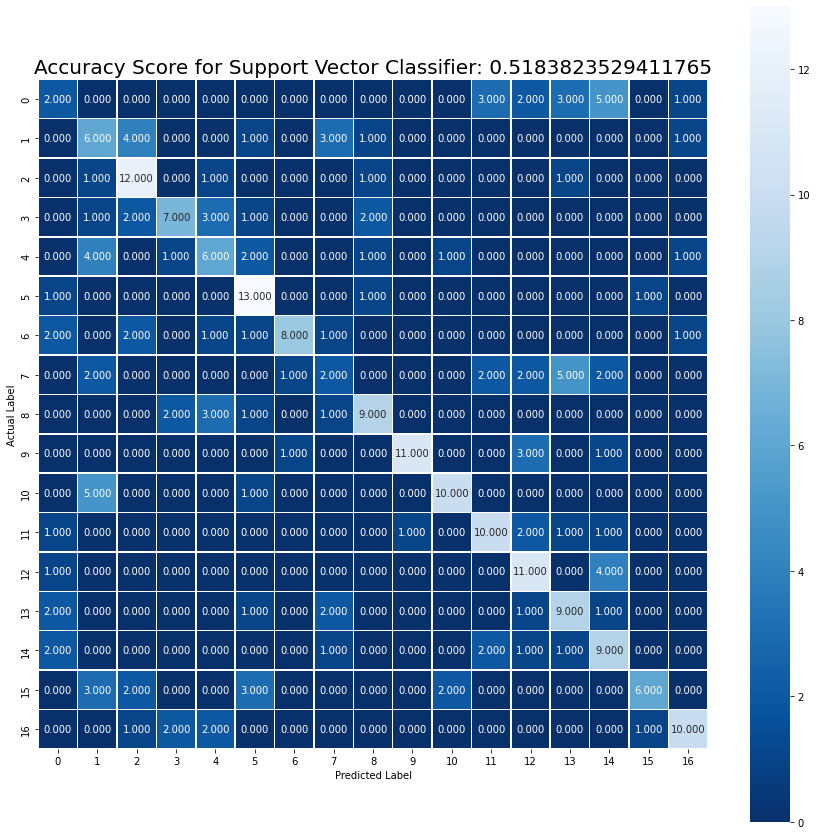

In [ ]:
cm = confusion_matrix(np.argmax(y_test, axis=1), pred)
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot = True, fmt = '.3f', linewidths = .5, square = True, cmap='Blues_r')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy Score for Support Vector Classifier: {0}'.format(accuracy_score(np.argmax(y_test, axis=1), pred))
plt.title(all_sample_title, size = 20)

In [ ]:
# Classification Report
cr = classification_report(np.argmax(y_test, axis=1),pred)
print(cr)

              precision    recall  f1-score   support

           0       0.18      0.12      0.15        16
           1       0.27      0.38      0.32        16
           2       0.52      0.75      0.62        16
           3       0.58      0.44      0.50        16
           4       0.38      0.38      0.38        16
           5       0.54      0.81      0.65        16
           6       0.80      0.50      0.62        16
           7       0.20      0.12      0.15        16
           8       0.60      0.56      0.58        16
           9       0.92      0.69      0.79        16
          10       0.77      0.62      0.69        16
          11       0.59      0.62      0.61        16
          12       0.50      0.69      0.58        16
          13       0.45      0.56      0.50        16
          14       0.39      0.56      0.46        16
          15       0.75      0.38      0.50        16
          16       0.71      0.62      0.67        16

    accuracy              

**ANN**

In [ ]:
#ImageDataGenerator declaration 
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=50,  
                                                          width_shift_range=0.1,  
                                                          height_shift_range=0.1,  
                                                          horizontal_flip=True, 
                                                          shear_range=0.2,
                                                          zoom_range=0.2,  
                                                          fill_mode="nearest")  

# Prepare the generator
datagen.fit(X_train)

In [ ]:
ann_batch_size = 32
ann_epochs = 50

In [ ]:
# Clear out tensorflow memory
tf.keras.backend.clear_session()

# Initialize Sequential model
ann = tf.keras.models.Sequential()

# Input layer 
ann.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(img_size,img_size,img_depth)))

# Normalize the data
ann.add(tf.keras.layers.BatchNormalization())

# Dense Layer
ann.add(tf.keras.layers.Dense(128,activation='relu'))

# Normalize the data
ann.add(tf.keras.layers.BatchNormalization())

# Flatten layer
ann.add(tf.keras.layers.Flatten())

# Dense Layer
ann.add(tf.keras.layers.Dense(32,activation='relu'))

# Normalize the data
ann.add(tf.keras.layers.BatchNormalization())

#Output layer
ann.add(tf.keras.layers.Dense(num_classes,activation='softmax'))

#Configuring the model for training
ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
# Model summary 
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 224, 224, 64)      256       
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 64)     256       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 224, 224, 128)     8320      
                                                                 
 batch_normalization_1 (Batc  (None, 224, 224, 128)    512       
 hNormalization)                                                 
                                                                 
 flatten (Flatten)           (None, 6422528)           0         
                                                                 
 dense_2 (Dense)             (None, 32)                2

In [ ]:
# Training the model
ann.fit(datagen.flow(X_train,y_train,batch_size=ann_batch_size),steps_per_epoch=X_train.shape[0]/32,epochs=ann_epochs,validation_data=(X_test,y_test))

Epoch 1/50
34/34 [==============================] - ETA: 0s - batch: 16.5000 - size: 32.0000 - loss: 2.6575 - acc: 0.2077

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


34/34 [==============================] - 14s 224ms/step - batch: 16.5000 - size: 32.0000 - loss: 2.6575 - acc: 0.2077 - val_loss: 2.8107 - val_acc: 0.1029
Epoch 2/50
34/34 [==============================] - 10s 286ms/step - batch: 16.5000 - size: 32.0000 - loss: 2.2634 - acc: 0.2656 - val_loss: 2.8320 - val_acc: 0.1140
Epoch 3/50
34/34 [==============================] - 10s 301ms/step - batch: 16.5000 - size: 32.0000 - loss: 2.0287 - acc: 0.3199 - val_loss: 2.8344 - val_acc: 0.0882
Epoch 4/50
34/34 [==============================] - 10s 310ms/step - batch: 16.5000 - size: 32.0000 - loss: 1.8807 - acc: 0.3768 - val_loss: 2.8368 - val_acc: 0.0735
Epoch 5/50
34/34 [==============================] - 10s 294ms/step - batch: 16.5000 - size: 32.0000 - loss: 1.7389 - acc: 0.4320 - val_loss: 2.8223 - val_acc: 0.0625
Epoch 6/50
34/34 [==============================] - 10s 295ms/step - batch: 16.5000 - size: 32.0000 - loss: 1.6386 - acc: 0.4715 - val_loss: 2.8030 - val_acc: 0.0588
Epoch 7/50
34/3

In [ ]:
# Final evaluation of the model
loss, acc = ann.evaluate(X_train, y_train, verbose=0)
print('Train Accuracy: %.3f%%' % (acc*100))
print('Train Loss: %.3f'% loss)
print()

loss, acc = ann.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f%%' % (acc*100))
print('Test Loss: %.3f'% loss)

Train Accuracy: 90.625%
Train Loss: 0.329

Test Accuracy: 71.324%
Test Loss: 1.006


In [ ]:
# Predicting for all of test dataset 
y_pred_ann = np.argmax(ann.predict(X_test),axis=-1)
# Label categorical Conversion
y_test_f = np.argmax(y_test,axis=-1)

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Text(0.5, 1.0, 'Accuracy Score for ANN: 0.7132352941176471')

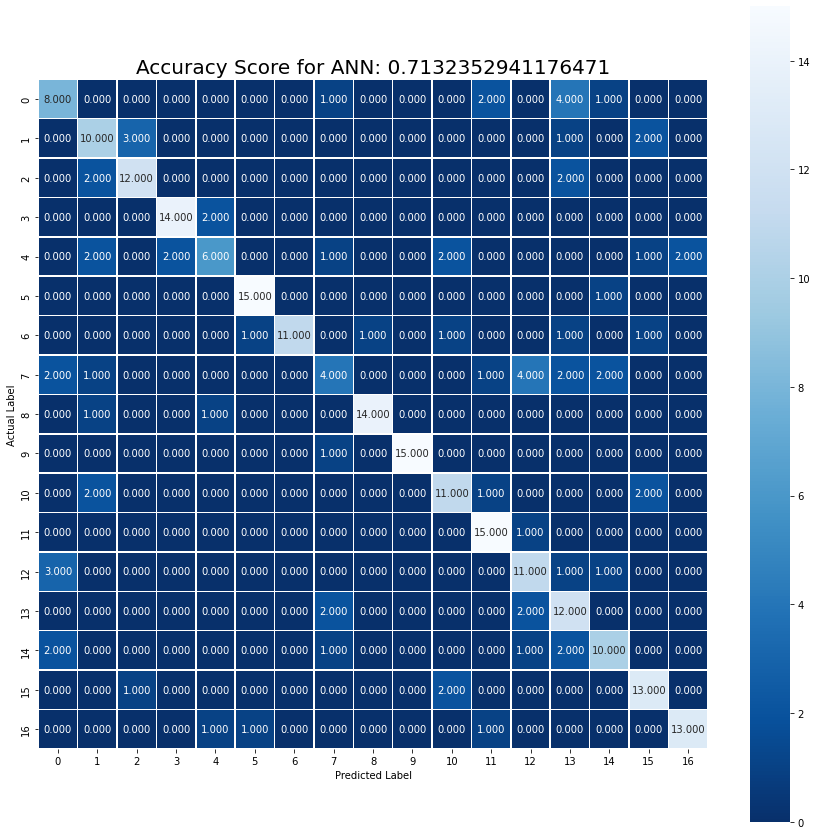

In [ ]:
# Confusion Matrix

cm = confusion_matrix(y_test_f,y_pred_ann)
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot = True, fmt = '.3f', linewidths = .5, square = True, cmap='Blues_r')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy Score for ANN: {0}'.format(accuracy_score(y_test_f,y_pred_ann))
plt.title(all_sample_title, size = 20)

In [ ]:
# Adding Final accuracy value to Results DataFrame
tempResultsDf3 = pd.DataFrame({'Model':['ANN'],'Accuracy': ann.evaluate(X_test, y_test, verbose=0)[1]},index={'4'})
resultsdf = pd.concat([resultsdf, tempResultsDf3])
resultsdf

Model  Accuracy
1           MultinomialNB  0.327206
2              GaussianNB  0.352941
3  support vector machine  0.518382
4                     ANN  0.713235

**CNN**

In [ ]:
cnn_batch_size = 32
cnn_epochs = 50

In [ ]:
#Clear any existing model in memory
tf.keras.backend.clear_session()

#Initialize model
cnn = tf.keras.models.Sequential()

#Adding first convolutional layer
cnn.add(tf.keras.layers.Conv2D(32, #Number of filters 
                               kernel_size=(3,3), #Size of the filter
                               activation='relu',
                               input_shape=(img_size,img_size,img_depth)))

#Add MaxPooling layer 1
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#Adding second convolutional layer
cnn.add(tf.keras.layers.Conv2D(32, #Number of filters 
                               kernel_size=(3,3), #Size of the filter
                               activation='relu', padding='same'))

#Add MaxPooling layer 2
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#Add dropout layer
cnn.add(tf.keras.layers.Dropout(0.25))

#Flatten the output
cnn.add(tf.keras.layers.Flatten())

#Dense layer 1
cnn.add(tf.keras.layers.Dense(256, activation='relu'))

#Add another dropout layer
cnn.add(tf.keras.layers.Dropout(0.25))

#Dense layer 2
cnn.add(tf.keras.layers.Dense(512, activation='relu'))

#Add another dropout layer
cnn.add(tf.keras.layers.Dropout(0.25))

#Dense layer 3
cnn.add(tf.keras.layers.Dense(1024, activation='relu')) #, kernel_regularizer = tf.keras.regularizers.l2( l=0.01)

#Add anoter dropout layer
cnn.add(tf.keras.layers.Dropout(0.25))

#Output layer
cnn.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

# Compile model
#adam_opt = tf.keras.optimizers.Adam(lr=0.00001)
cnn.compile(optimizer=tf.keras.optimizers.RMSprop(lr=2e-4), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=5,verbose=1, mode='auto')
callback_list = [early_stopping]


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
# Model summary 
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 111, 111, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 55, 55, 32)        0         
                                                                 
 flatten (Flatten)           (None, 96800)             0

In [ ]:
#Train the model
cnn.fit(datagen.flow(X_train,y_train,batch_size=cnn_batch_size),
                    steps_per_epoch=X_train.shape[0]/32,
                    epochs=cnn_epochs,
                    validation_data=(X_test,y_test))
                  

Epoch 1/50
34/34 [==============================] - 14s 192ms/step - batch: 16.5000 - size: 32.0000 - loss: 2.9244 - acc: 0.0846 - val_loss: 2.6025 - val_acc: 0.1765
Epoch 2/50


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


34/34 [==============================] - 9s 276ms/step - batch: 16.5000 - size: 32.0000 - loss: 2.5042 - acc: 0.1700 - val_loss: 2.1938 - val_acc: 0.2353
Epoch 3/50
34/34 [==============================] - 9s 278ms/step - batch: 16.5000 - size: 32.0000 - loss: 2.2637 - acc: 0.2178 - val_loss: 2.0232 - val_acc: 0.2794
Epoch 4/50
34/34 [==============================] - 9s 274ms/step - batch: 16.5000 - size: 32.0000 - loss: 2.0670 - acc: 0.2776 - val_loss: 1.7880 - val_acc: 0.3971
Epoch 5/50
34/34 [==============================] - 9s 273ms/step - batch: 16.5000 - size: 32.0000 - loss: 1.9227 - acc: 0.3235 - val_loss: 1.6489 - val_acc: 0.4265
Epoch 6/50
34/34 [==============================] - 10s 282ms/step - batch: 16.5000 - size: 32.0000 - loss: 1.8425 - acc: 0.3658 - val_loss: 1.5809 - val_acc: 0.4485
Epoch 7/50
34/34 [==============================] - 9s 273ms/step - batch: 16.5000 - size: 32.0000 - loss: 1.7230 - acc: 0.4007 - val_loss: 1.4542 - val_acc: 0.5110
Epoch 8/50
34/34 [==

In [ ]:
# Final evaluation of the model
loss, acc = cnn.evaluate(X_train, y_train, verbose=0)
print('Train Accuracy: %.3f%%' % (acc*100))
print('Train Loss: %.3f'% loss)
print()

loss, acc = cnn.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f%%' % (acc*100))
print('Test Loss: %.3f'% loss)

Train Accuracy: 82.812%
Train Loss: 0.495

Test Accuracy: 70.221%
Test Loss: 0.965


In [ ]:
# Predicting for all of test dataset 
y_pred_cnn = np.argmax(cnn.predict(X_test),axis=-1)
# Label categorical Conversion
y_test_f = np.argmax(y_test,axis=-1)

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Text(0.5, 1.0, 'Accuracy Score for CNN: 0.7022058823529411')

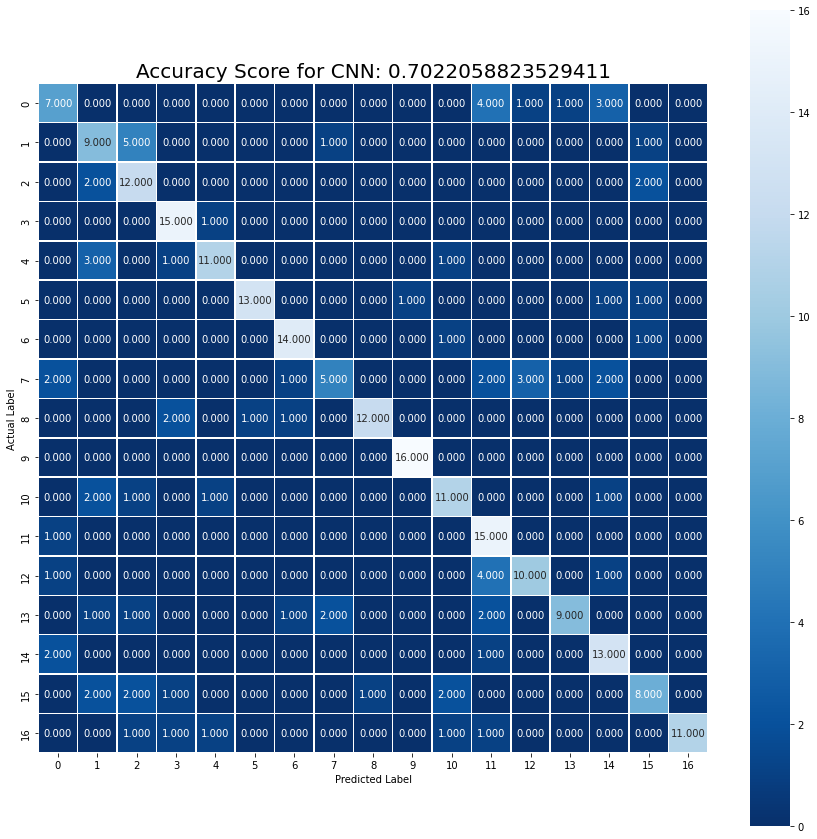

In [ ]:
# Confusion Matrix

cm = confusion_matrix(y_test_f,y_pred_cnn)
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot = True, fmt = '.3f', linewidths = .5, square = True, cmap='Blues_r')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy Score for CNN: {0}'.format(accuracy_score(y_test_f,y_pred_cnn))
plt.title(all_sample_title, size = 20)

In [ ]:
# Adding Final accuracy value to Results DataFrame
tempResultsDf5 = pd.DataFrame({'Model':['CNN'],'Accuracy': cnn.evaluate(X_test, y_test, verbose=0)[1]},index={'5'})
resultsdf = pd.concat([resultsdf, tempResultsDf5])
resultsdf

Model  Accuracy
1           MultinomialNB  0.327206
2              GaussianNB  0.352941
3  support vector machine  0.518382
4                     ANN  0.713235
5                     CNN  0.702206

**ANN is the best performing model**

**"Prediction.jpg" predicting with the best performing model**

In [ ]:
imgP = Image.open('/content/drive/My Drive/PyData/CVProject1/plant-seedlings-classification/Prediction.jpg')

In [ ]:
imgP = np.array(imgP).astype(np.uint8)
print(type(imgP))
imgP.shape

<class 'numpy.ndarray'>


(224, 224, 3)

In [ ]:
res = cv.resize(imgP,(224,224), interpolation = cv.INTER_CUBIC)


In [ ]:
img_predict = np.expand_dims(imgP,axis = 1)

In [ ]:
ann_predict = np.argmax(ann.predict(img_predict))

InvalidArgumentError: ignored

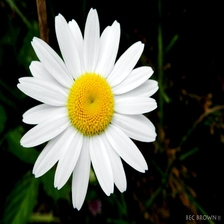

In [ ]:
from google.colab.patches import cv2_imshow

img_pred = cv.imread('/content/drive/My Drive/PyData/CVProject1/plant-seedlings-classification/Prediction.jpg')
img_pred_resize = cv.resize(img_pred,(224,224), interpolation = cv.INTER_CUBIC)
cv2_imshow(img_pred_resize)
img_predict = np.expand_dims(img_pred_resize, axis=0)

In [ ]:
type(img_predict)
img_predict.shape

(1, 224, 224, 3)

In [ ]:
# pred_img = np.squeeze(img_predict, axis=0)
ann_predict = np.argmax(ann.predict(img_predict))

InvalidArgumentError: ignored